# **1. Introduction**

- **Objective :**To create predictive model to predict the win probabilty of a PUBG(Player Unknown's Battle Grounds) match.
- **Dataset :** We are using the PUBG dataset. Total records - 4446966

# **2. Importing Neccessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler, LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

# **3. Load Data**

In [ ]:
pd.set_option('Display.max_columns',None)

In [ ]:
data = pd.read_csv('pubg.csv')
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


# **4.Basic Checks**

In [ ]:
data.info(),data.describe(),data.describe(include='O')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

(None,
             assists        boosts   damageDealt         DBNOs  headshotKills  \
 count  4.446966e+06  4.446966e+06  4.446966e+06  4.446966e+06   4.446966e+06   
 mean   2.338149e-01  1.106908e+00  1.307171e+02  6.578755e-01   2.268196e-01   
 std    5.885731e-01  1.715794e+00  1.707806e+02  1.145743e+00   6.021553e-01   
 min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
 25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
 50%    0.000000e+00  0.000000e+00  8.424000e+01  0.000000e+00   0.000000e+00   
 75%    0.000000e+00  2.000000e+00  1.860000e+02  1.000000e+00   0.000000e+00   
 max    2.200000e+01  3.300000e+01  6.616000e+03  5.300000e+01   6.400000e+01   
 
               heals     killPlace    killPoints         kills   killStreaks  \
 count  4.446966e+06  4.446966e+06  4.446966e+06  4.446966e+06  4.446966e+06   
 mean   1.370147e+00  4.759935e+01  5.050060e+02  9.247833e-01  5.439551e-01   
 std    2.679982e+00  

In [ ]:
data.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [ ]:
data.shape

(4446966, 29)

## **4.1 Reducing dataset memory**

- In the original dataset, memory consumed is 983.9 MB. Processing time will be more if we process with this huge datset size.
- So before proceeding, we are reducing the memory consumed by the dataset.

In [ ]:
# Looping through each column
for column_name in data:
    if data[column_name].dtype=='float64': # Checking if the columns is float data type
        data[column_name] = pd.to_numeric(data[column_name], downcast= 'float')
    if data[column_name].dtype=='int64': # Checking if the columns is int data type
        data[column_name] = pd.to_numeric(data[column_name],downcast='integer')
# Above code will check for data type and convert into memory efficient data type.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int8   
 4   boosts           int8   
 5   damageDealt      float32
 6   DBNOs            int8   
 7   headshotKills    int8   
 8   heals            int8   
 9   killPlace        int8   
 10  killPoints       int16  
 11  kills            int8   
 12  killStreaks      int8   
 13  longestKill      float32
 14  matchDuration    int16  
 15  matchType        object 
 16  maxPlace         int8   
 17  numGroups        int8   
 18  rankPoints       int16  
 19  revives          int8   
 20  rideDistance     float32
 21  roadKills        int8   
 22  swimDistance     float32
 23  teamKills        int8   
 24  vehicleDestroys  int8   
 25  walkDistance     float32
 26  weaponsAcquired  int16  
 27  winPoints   

- Before reducing - 983.9 MB
- After reducing - 373.2 MB

# **5. EDA**

**Context :** The project aims to predict the winning prediction of PUBG game.

## **5.1 ID**

- ID : Player's ID
- Each record has unique ID.
- No null value present.
- Since ID don't have enough information for data processing. Skipping this column from further processing.

In [ ]:
data.Id.value_counts()

Id
7f96b2f878858a    1
d19659ceb5b553    1
b587ef96cf8d87    1
66715fcb3b871d    1
59e0d2fdd292a8    1
                 ..
0f3c9b54ce4173    1
9a91d96d201b22    1
a92d0949e8830e    1
f1d8ef55f70584    1
0d8e7ed728b6fd    1
Name: count, Length: 4446966, dtype: int64

## **5.2 GroupId**

- To identify set/group of players within a match.
- Group ID will change for every match even for the same set of players.
- for each match and each group unique id will be generated.

In [ ]:
data.groupId.value_counts()

groupId
14d6b54cdec6bc    74
b8275198faa03b    72
128b07271aa012    64
7385e5fe214021    49
e52a2e6ca30474    36
                  ..
5941df37c809be     1
ab58ce5a22ed97     1
7b5f1742ce18a5     1
ed3a2c5863cee3     1
8c74f72fedf5ff     1
Name: count, Length: 2026745, dtype: int64

## **5.3 Match ID**

 - Unique ID provided for each game.
 - In PUBG, max 100 players can play in a game

In [ ]:
# Total records
len(data.matchId)

4446966

In [ ]:
# No of unique games played
len(data.matchId.unique())

47965

In [ ]:
# No of players played per game
data.groupby('matchId')['matchId'].count()

matchId
0000a43bce5eec     95
0000eb01ea6cdd     98
0002912fe5ed71     95
0003b92987589e    100
0006eb8c17708d     93
                 ... 
fffd74b5150cb4     97
fffe53015be300     97
fffe562611d981     94
fffe721f841f85     97
fffe92232706aa     93
Name: matchId, Length: 47965, dtype: int64

## **5.4 Assists**

- If the player has given damage to the enemy and his team-mate also kills the same enemy, now both players has given some damage to the enemy and this counted as 'Assist Kill'.

In [ ]:
data.assists.unique()

array([ 0,  1,  3,  2,  4,  6,  5,  8,  9,  7, 13, 11, 12, 21, 10, 20, 14,
       17, 22, 15], dtype=int8)

In [ ]:
data.assists.value_counts()

assists
0     3667660
1      591883
2      137144
3       35640
4        9990
5        2892
6         976
7         387
8         185
9          84
10         48
11         27
12         20
13         16
15          7
14          2
17          2
21          1
20          1
22          1
Name: count, dtype: int64

## **5.5 Boosts**

 - This column denotes the number of boost items used by the player
 - 0 means no boosts used.

In [ ]:
data.boosts.unique()

array([ 0,  1,  2,  3,  4,  6,  5,  9,  7,  8, 11, 10, 13, 14, 12, 21, 15,
       20, 16, 17, 33, 19, 18, 24, 28, 23, 22], dtype=int8)

In [ ]:
data.boosts.value_counts()

boosts
0     2521324
1      680252
2      491316
3      295883
4      195729
5      120271
6       70111
7       37626
8       18893
9        8638
10       3992
11       1644
12        726
13        295
14        126
15         62
16         30
17         16
18         13
19          6
21          4
20          3
24          2
33          1
28          1
23          1
22          1
Name: count, dtype: int64

## **5.6 Damage Dealt**

- Amount of damage caused by the player to the opponents.
- Value ranges from 0.0 to 6616.0

In [ ]:
data.damageDealt.value_counts()

damageDealt
0.0000      1238102
100.0000     262781
200.0000      62398
300.0000      13767
75.0000       12825
             ...   
9.9160            1
0.1798            1
1.6690            1
0.5956            1
0.8705            1
Name: count, Length: 29916, dtype: int64

## **5.7 DBNOs**

- Count of the enemy players knocked

In [ ]:
data.DBNOs.value_counts()

DBNOs
0     2773735
1      983281
2      395119
3      162682
4       69307
5       31686
6       14977
7        7291
8        3694
9        1966
10       1110
11        643
12        466
13        275
14        177
15        137
16         87
17         80
18         64
19         34
20         30
21         26
22         18
25         16
23         14
26         11
24         10
33          7
27          6
32          3
31          3
28          3
39          2
38          1
30          1
29          1
35          1
40          1
53          1
Name: count, dtype: int64

## **5.8 Head Shot Kills**

- Number of enemy players killed with headshots
- 0 indicates no headshots done
- Max of 64 headshots done by a player

In [ ]:
data.headshotKills.unique()

array([ 0,  1,  2,  3,  6,  4,  5,  8,  9,  7, 17, 10, 14, 12, 40, 11, 13,
       15, 16, 18, 27, 19, 21, 23, 42, 31, 20, 46, 39, 34, 26, 64, 41, 35],
      dtype=int8)

In [ ]:
data.headshotKills.value_counts()

headshotKills
0     3696116
1      574741
2      126348
3       32975
4        9962
5        3616
6        1439
7         757
8         373
9         215
10        136
11         79
12         64
13         44
14         23
15         16
16         15
17         11
18          9
19          3
23          3
20          3
26          3
31          2
34          2
27          2
21          2
41          1
64          1
40          1
39          1
46          1
42          1
35          1
Name: count, dtype: int64

## **5.9 Heals**

- In PUBG, a player can heal using a variety of heal items (like first-aid kits, bandages, energy drinks, painkillers, adrenaline syringes etc)
- A player has Max of 80 heals.
- 0 indicates no heal.

In [ ]:
data.heals.unique()

array([ 0,  5,  2, 14, 12,  1,  8,  3,  4,  6,  9, 13,  7, 24, 10, 15, 25,
       11, 18, 17, 20, 16, 29, 23, 19, 21, 22, 27, 28, 32, 47, 26, 31, 30,
       43, 33, 37, 34, 38, 52, 35, 42, 48, 40, 41, 44, 39, 45, 36, 61, 46,
       57, 63, 50, 55, 49, 59, 54, 51, 56, 73, 80, 62], dtype=int8)

In [ ]:
data.heals.max()

80

## **5.10 Kill Place**

- In PUBG, the killPlace metric represents a player’s ranking in a match based on the number of enemy players they have killed. It indicates how well a player performed in terms of kills compared to other players in the same match.

- KillPlace of 1 means the player had the most kills in that match.
- KillPlace of 50 means the player had fewer kills compared to others.

- This metric is useful for analyzing player performance and to understand player's behavior and strategies.

In [ ]:
data.killPlace.unique()

array([ 60,  57,  47,  75,  45,  44,  96,  48,  64,  74,  37,   5,  25,
        72,  13,  79,  18,  15,   2,   3,  11,  78,   7,   6,  87,  62,
        80,  61,  34,  24,  82,  73,  31,  86,  46,  12,  27,  77,  19,
        10,  63,  67,  36,   4,  29,  16,   8,  41,  21,  38,  55,  49,
        91,  54,  40,  69,  92,  23,  71,  30,  20,  81,  56,  84,  66,
        52,  85,  94,  50,  83,  58,  68,  65,  28,  26,  51,  35,  90,
        89,  42,  59,  53,  33,   9,  88,  43,  70,  17,  76,   1,  95,
        99,  22,  39,  32,  93,  14,  97,  98, 100, 101], dtype=int8)

## **5.11 Kill Points**

- Kill points refer to the points earned for eliminating other players.
- Each kill typically awards certain number of points, which can vary depending on the game mode.
- For solo mode - 20 points per kill and for squad mode - 10 points per kill.
- These points contribute to overall ranking and can helps to climb the leaderboard.

In [ ]:
data.killPoints.value_counts()

killPoints
0       2655647
1000     137679
1256       3433
1233       3334
1268       3320
         ...   
2002          1
379           1
430           1
549           1
392           1
Name: count, Length: 1707, dtype: int64

In [ ]:
# Highest kill point hold by a player
data.killPoints.max()

2170

In [ ]:
data.loc[data.killPoints > 1500, 'killPoints']

23         1564
43         1717
108        1575
115        1604
130        1814
           ... 
4446823    1639
4446898    1526
4446901    1514
4446933    1528
4446935    1546
Name: killPoints, Length: 206353, dtype: int16

## **5.12 Kills**

- Kill refers to the act of eliminating another player during a match.
- When a player successfully defeat an opponent, it counts as a kill and is recorded in your match statistics.
- Kills are a crucial part of the game as they contribute to overall score and ranking.

In [ ]:
data.kills.unique()

array([ 0,  1,  4,  2,  9,  3,  5,  6,  8,  7, 14, 13, 15, 12, 21, 11, 10,
       17, 20, 24, 18, 16, 22, 19, 23, 35, 31, 27, 25, 48, 42, 30, 26, 65,
       39, 33, 28, 29, 34, 57, 55, 56, 36, 38, 37, 44, 66, 41, 50, 53, 43,
       32, 40, 47, 45, 46, 49, 72], dtype=int8)

In [ ]:
data.kills.value_counts()

kills
0     2529722
1      928079
2      472466
3      232441
4      124543
5       66577
6       37960
7       21816
8       12779
9        7644
10       4599
11       2799
12       1755
13       1137
14        757
15        484
16        325
17        234
18        165
19        112
20        109
22         77
21         70
23         47
24         44
25         27
26         27
28         22
27         21
30         13
29         13
31         13
33         12
36          8
38          7
35          7
34          5
41          5
37          5
32          4
53          4
40          4
39          4
43          3
42          3
56          2
55          2
44          2
46          2
57          2
49          1
45          1
47          1
48          1
50          1
66          1
65          1
72          1
Name: count, dtype: int64

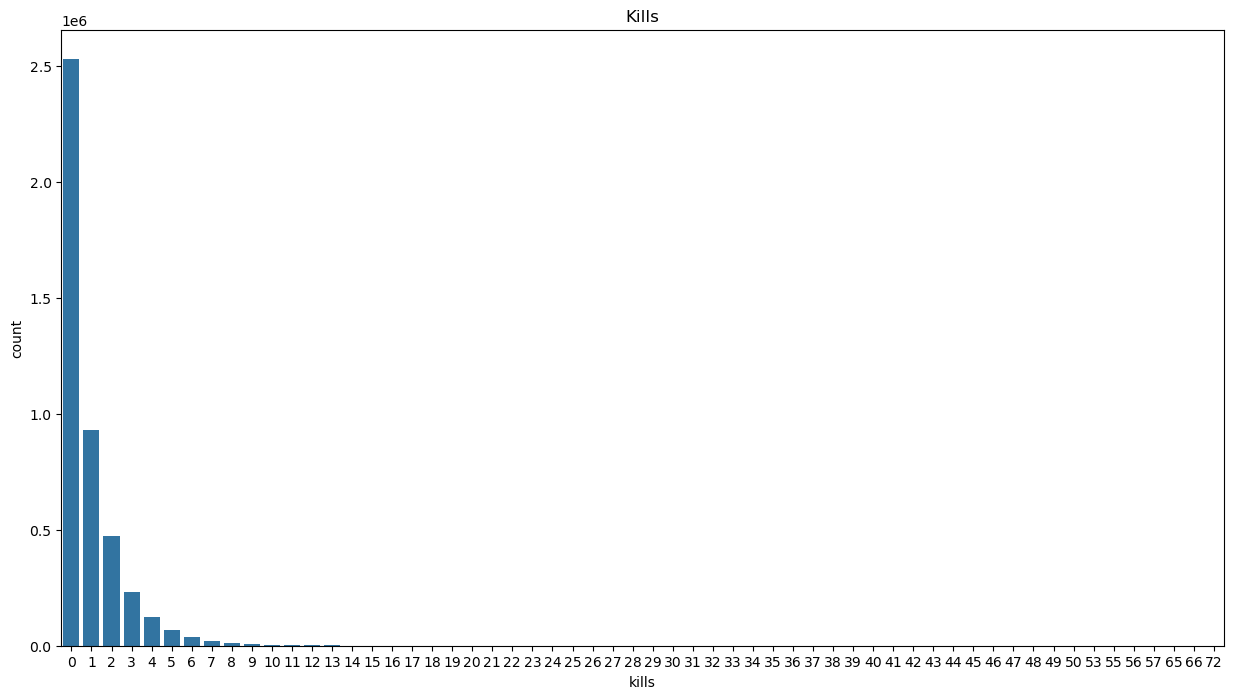

In [ ]:
plt.subplots(figsize=(15,8))
sns.countplot(data=data,x=data['kills'])
plt.title('Kills')
plt.show()

## **5.13 Kill Steaks**

- Kill streak refers to the number of kills a player achieves in quick succession without dying.
- The exact time frame for what constitutes a kill streak can vary, but it generally means getting multiple kills within a short period.
- If a player eliminate several opponents in rapid succession, it is counted as a kill streak.
- Kill streaks are often highlighted in the game and can be a source of pride for players, showcasing their skill.

In [ ]:
data.killStreaks.unique()

array([ 0,  1,  2,  4,  3,  5,  6,  7, 10, 14,  8,  9, 11, 12, 13, 16, 18,
       20], dtype=int8)

In [ ]:
data.killStreaks.value_counts()

killStreaks
0     2529722
1     1475558
2      389346
3       45958
4        5711
5         409
6         126
7          54
8          32
9          18
10          9
11          8
13          5
12          5
14          2
16          1
18          1
20          1
Name: count, dtype: int64

## **5.14 Longest Kill**

- Longest Kill refers to the farthest distance from which a player has successfully eliminated an opponent in a match.
- This statistic is often highlighted in the player’s match summary and can be a point of pride, showcasing their skill in long-range combat.

In [ ]:
data.longestKill.unique()

array([ 0.    , 58.53  , 18.44  , ...,  0.5843,  0.6309,  0.7761],
      dtype=float32)

In [ ]:
data.longestKill.value_counts()

longestKill
0.000000      2538735
102.599998        457
101.099998        451
10.500000         449
11.480000         447
               ...   
545.200012          1
625.099976          1
581.500000          1
865.799988          1
0.776100            1
Name: count, Length: 28284, dtype: int64

## **5.15 Match Duration**

- In PUBG, the duration of a match can vary depending on several factors, including the game mode and how long you survive.
- On average, a match lasts around 30 minutes.
- However, if player is eliminated early, match could be much shorter, and player can immediately start a new one

In [ ]:
data.matchDuration.unique()

array([1306, 1777, 1318, ...,  657,  990,    9], dtype=int16)

In [ ]:
# Shortest match duration
data.matchDuration.min()

9

In [ ]:
# Longest match duration
data.matchDuration.max()

2237

## **5.16 Match Type**

- In PUBG, there are several match types designed to cater to different playstyles and preferences. Few main game types are
    1. Classic Mode (Solo, Duo, Squad)
    2. Arcade Mode
    3. ranked Mode
    4. Training Mode
    5. Custom Mode
    6. Event Mode

- This is categorical column and needs to be converted into numerical column

In [ ]:
data.matchType.unique()

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
       'normal-squad-fpp', 'crashfpp', 'flaretpp', 'normal-solo-fpp',
       'flarefpp', 'normal-duo-fpp', 'normal-duo', 'normal-squad',
       'crashtpp', 'normal-solo'], dtype=object)

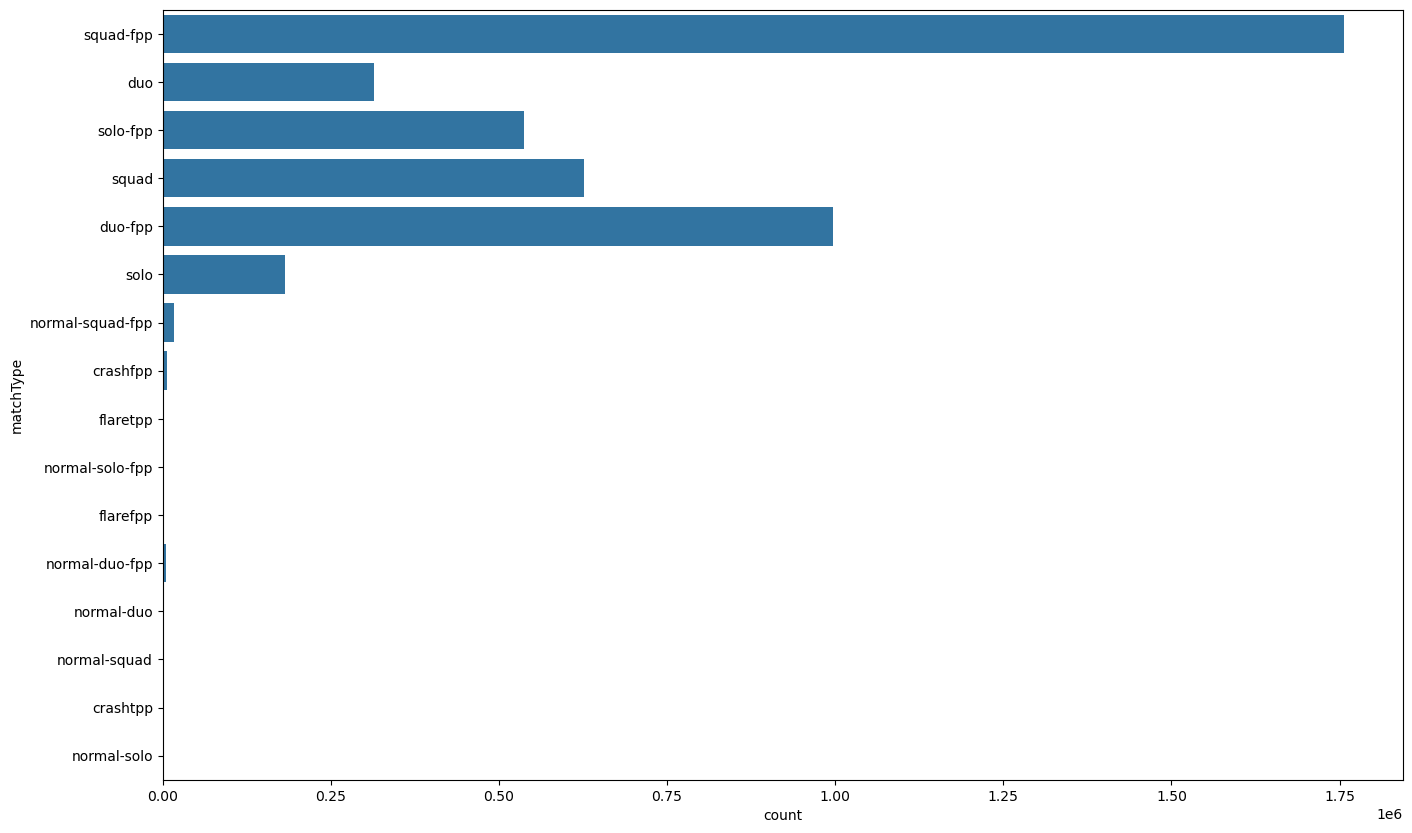

In [ ]:
plt.figure(figsize=(16,10))
sns.countplot(data.matchType)
plt.show()

In [ ]:
len(data.matchType.unique())

16

In [ ]:
data.matchType.head(6)

0    squad-fpp
1    squad-fpp
2          duo
3    squad-fpp
4     solo-fpp
5    squad-fpp
Name: matchType, dtype: object

**Inference:**
- There are 16 unique match types in the dataset, out of which top 6 match types(99.21%) are played mostly.
- Other match types(0.79%) can be removed.

## **5.17 Max Place**

- Max place refers to the highest placement or rank a player can achieve in a match.
- Achieving the max place involves being the last player or team standing out of up to 100 participants in a match.

In [ ]:
data.maxPlace.unique()

array([ 28,  26,  50,  31,  97,  96,  29,  48,  27,  30,  49,  47,  46,
        92,  95,  45,  99,  25,  90,  94,  21,  93,  32,  41,  98,  34,
        91,  44, 100,  42,  24,  16,  89,  33,  43,  40,  78,  51,  86,
        19,  85,  22,  12,  35,  88,  20,  23,  36,   8,  18,  70,  13,
        17,  15,  83,  39,  60,  73,  84,  79,   7,  87,  54,  10,  37,
        74,  80,  14,  38,   6,  81,   5,  82,  52,  11,  63,  67,  76,
        59,  57,  61,  69,   3,  64,   4,  55,  66,  75,  68,   2,  65,
         9,  77,  62,  56,  72,  71,  58,  53,   1], dtype=int8)

In [ ]:
# Only 1 player holds first place in this dataset
data.loc[data.maxPlace == 1]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,0,0,0,0.0,9,solo-fpp,1,1,1574,0,0.0,0,0.0,0,0,0.0,0,0,NaN


## **5.18 numGroups**

- This refers to the number of groups or teams in a match.
- In PUBG, players can join matches as solo players, duos, or squads.
- The numGroups value indicates how many distinct groups are competing in the match.

In [ ]:
data.numGroups.unique()

array([ 26,  25,  47,  30,  95,  28,  92,  27,  29,  46,  94,  48,  45,
        44,  31,  89,  93,  42,  23,  49,  86,  50,  20,  88,  36,  24,
        96,  97,  32,  41,  85,  91,  43,  98,  40,  79,  16,  34,  73,
        90,  39,  87,  77,  22,  84,   1,  83,  12,  33,  19,  78,   8,
        13,   2,  65,  17, 100,  21,  75,  82,  99,  59,  64,  70,  72,
         7,  80,  53,  10,  15,  18,  76,  81,  66,  38,  58,   6,  74,
         5,  35,  52,  11,  14,  37,  56,   9,  60,  67,  71,   3,  63,
        54,   4,  61,  68,  62,  69,  51,  57,  55], dtype=int8)

In [ ]:
# Max of 100 groups participated in a match. In PUBG, max 100 participants can participate in a game.
data.numGroups.max()

100

## **5.19 rankPoints**

- Rank points are a measure of a player’s performance in ranked matches.
- They are used to determine a player’s rank in the competitive ladder.
- Players earn or lose rank points based on their performance in each match, including factors like kills, survival time, and final placement.

In [ ]:
data.rankPoints.unique()

array([  -1, 1484, 1491, ...,  225, 3489, 2962], dtype=int16)

In [ ]:
# Max rank point is 5910
data.rankPoints.max(),data.rankPoints.min()

(5910, -1)

## **5.20 revives**

- This stat tracks the number of times a player has revived their teammates.
- In squad or duo matches, players can revive downed teammates, allowing them to continue fighting.
- The revives stat shows how often a player has successfully performed this action.

In [ ]:
data.revives.unique()

array([ 0,  1,  3,  2,  4,  5,  6,  8,  9,  7, 13, 16, 11, 12, 10, 17, 14,
       19, 15, 18, 20, 28, 23, 39, 32], dtype=int8)

## **5.21 rideDistance**

- This measures the total distance a player has traveled while driving or riding in vehicles during a match.
- It is an important stat for understanding a player’s mobility and use of vehicles for rotation and positioning.

In [ ]:
data.rideDistance.unique()

array([0.000e+00, 4.500e-03, 2.004e+03, ..., 8.851e+00, 3.123e+00,
       6.951e+01], dtype=float32)

In [ ]:
# Maximum distance travelled by a player in match
data.rideDistance.max()

40710.0

## **5.22 roadKills**

- Road kills refer to the number of enemies a player has eliminated by running them over with a vehicle.
- This can be a strategic way to get kills, especially in open areas where enemies might be exposed.

In [ ]:
data.roadKills.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  8,  7,  9, 14, 11, 18, 10], dtype=int8)

## **5.23 swimDistance**

- This stat measures the total distance a player has swim during a match.
- Swimming can be a useful way to cross bodies of water and avoid detection, but it also leaves players vulnerable to attacks.

In [ ]:
data.swimDistance.value_counts()

swimDistance
0.000000      4157694
102.400002        122
101.400002        104
102.800003        104
114.099998         99
               ...   
0.435600            1
0.144600            1
0.768400            1
0.794800            1
802.599976          1
Name: count, Length: 28345, dtype: int64

- 122 players swimmed a max distance of 102.4

## **5.24 teamKills**

- This refers to the number of times a player has accidentally or intentionally killed a teammate.
- Team kills are generally discouraged and can negatively impact your team’s performance and your reputation in the game.

In [ ]:
data.teamKills.value_counts()

teamKills
0     4350036
1       88771
2        7236
3         829
4          81
5           7
10          2
7           1
12          1
6           1
8           1
Name: count, dtype: int64

## **5.25 vehicleDestroys**

- This stat tracks the number of vehicles a player has destroyed during a match.
- Destroying vehicles can be a strategic move to prevent enemies from using them for transportation or cover.

## **5.26 walkDistance**

- This measures the total distance a player has traveled on foot during a match.
- It is recorded in meters and gives an idea of how much a player has moved around the map.

In [ ]:
data.walkDistance.value_counts()

walkDistance
0.0000       99603
1007.0000      955
1098.0000      945
1047.0000      939
1036.0000      934
             ...  
0.8005           1
0.3570           1
7935.0000        1
0.8721           1
0.9661           1
Name: count, Length: 38599, dtype: int64

In [ ]:
data.walkDistance.max()

25780.0

In [ ]:
data.loc[data.walkDistance == 25780.0]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
497965,3304d0c68e27f5,503757159d22dd,ce88f9c8c35bdf,0,0,0.0,0,0,0,46,0,0,0,0.0,1889,solo-fpp,95,93,1520,0,0.0078,0,381.899994,0,0,25780.0,0,0,0.9894


- Max of 955 players has walked a distance of 1007 metres during a match.
- 1 Player has walked a distance of 25780 metres during a match.

## **5.27 weaponsAcquired**

- This indicates the number of weapons a player has picked up during a match.
- It shows how well a player is looting and preparing for combat.

In [ ]:
data.weaponsAcquired.value_counts()

weaponsAcquired
2      768836
3      768347
4      689622
1      580951
5      540721
        ...  
83          1
102         1
77          1
128         1
92          1
Name: count, Length: 97, dtype: int64

In [ ]:
# 1 Player has acquired max of 236 weapons during a match
data.weaponsAcquired.max()

236

## **5.28 winPoints**

- Win points are part of the ranking system and are awarded based on a player’s performance in matches.
- They contribute to a player’s overall ranking and are influenced by factors such as kills, survival time, and final placement.

In [ ]:
data.winPoints.value_counts()

winPoints
0       2655647
1500     153675
1502      18859
1501      18829
1503      18752
         ...   
888           1
913           1
1044          1
1053          1
916           1
Name: count, Length: 1447, dtype: int64

In [ ]:
# Highest winpoints
data.winPoints.max()

2013

## **5.29 winPlacePerc**

- This is a Target Variable.
- This stands for “Win Placement Percentage” and represents a player’s placement in a match on a scale from 0 to 1,
- where 1 is first place and 0 is last place.
- It is used to gauge a player’s consistency in achieving high placements.

In [ ]:
data.winPlacePerc.value_counts()

winPlacePerc
0.0000    220505
1.0000    127573
0.5000     55065
0.3333     42508
0.6667     38112
           ...  
0.5962         1
0.7167         1
0.8197         1
0.1639         1
0.2879         1
Name: count, Length: 3000, dtype: int64

In [ ]:
data.loc[data.winPlacePerc == 1.0]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
67,22252be49d4419,37fa7583da2fa2,1ce1cb998f75c7,1,5,378.799988,2,3,6,4,0,4,2,61.389999,1297,squad-fpp,29,28,1431,0,317.700012,0,0.000000,0,1,3120.0,4,0,1.0
107,7970b4ea89e81e,abf9e2780b9f48,04832cfd74ff30,1,1,58.360001,0,0,2,38,0,0,0,0.000000,1708,squad,26,25,1494,0,5134.000000,0,0.000000,0,0,2708.0,7,0,1.0
118,953577684b828a,54ce33c41ef9ff,c5d412db6dbee4,2,6,76.110001,0,0,12,45,0,0,0,0.000000,1388,duo-fpp,49,47,1468,1,0.000000,0,0.000000,0,0,2635.0,7,0,1.0
123,174c758156bcf3,a935604c9bb7aa,edc87c8d445823,1,9,626.200012,4,3,2,4,1333,6,2,85.739998,1405,squad-fpp,29,28,-1,0,1045.000000,0,0.000000,0,0,2814.0,7,1566,1.0
186,eb7a3e9f50eca5,fe3d74f737cd10,92338c2233be1a,0,5,778.000000,0,3,2,2,1693,8,1,158.899994,1387,solo-fpp,98,97,-1,0,0.000000,0,0.000000,0,0,2422.0,5,1506,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446846,7fa83fe797d3c9,2b3e8b4c88730e,841d12ab0cf4c0,0,3,567.599976,0,2,1,1,1000,6,1,79.300003,1732,normal-solo-fpp,51,51,-1,0,0.000000,0,92.309998,0,0,3103.0,4,1500,1.0
4446851,94821d018a4c96,de5a790796b4e9,56c24019494299,1,6,886.299988,5,2,3,2,0,6,2,54.869999,1820,squad-fpp,30,30,1484,2,2216.000000,0,0.000000,0,0,3857.0,11,0,1.0
4446878,b4a03144c7f292,af465c2d950f4b,32eb0143ac4c6f,0,2,100.000000,1,0,1,20,0,1,1,29.660000,1290,squad-fpp,26,25,1484,0,0.000000,0,0.000000,0,0,2416.0,5,0,1.0
4446896,150f2e129ede6b,4417126d5b0d71,8dddf0ace87e54,0,5,129.399994,1,0,0,13,0,2,1,270.200012,1351,squad-fpp,30,29,1538,1,0.000000,0,0.000000,0,0,3320.0,3,0,1.0


In [ ]:
# 1 Null value present in the Target variable. Since there are millions of data, dropping 1 row will not have affect the accuracy.
data.loc[data.winPlacePerc.isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,0,0,0,0.0,9,solo-fpp,1,1,1574,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [ ]:
null_data = data.loc[data.winPlacePerc.isnull()].index
data.drop(null_data,axis=0,inplace=True)

In [ ]:
data.loc[data.winPlacePerc.isnull()] # Null value handled

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc


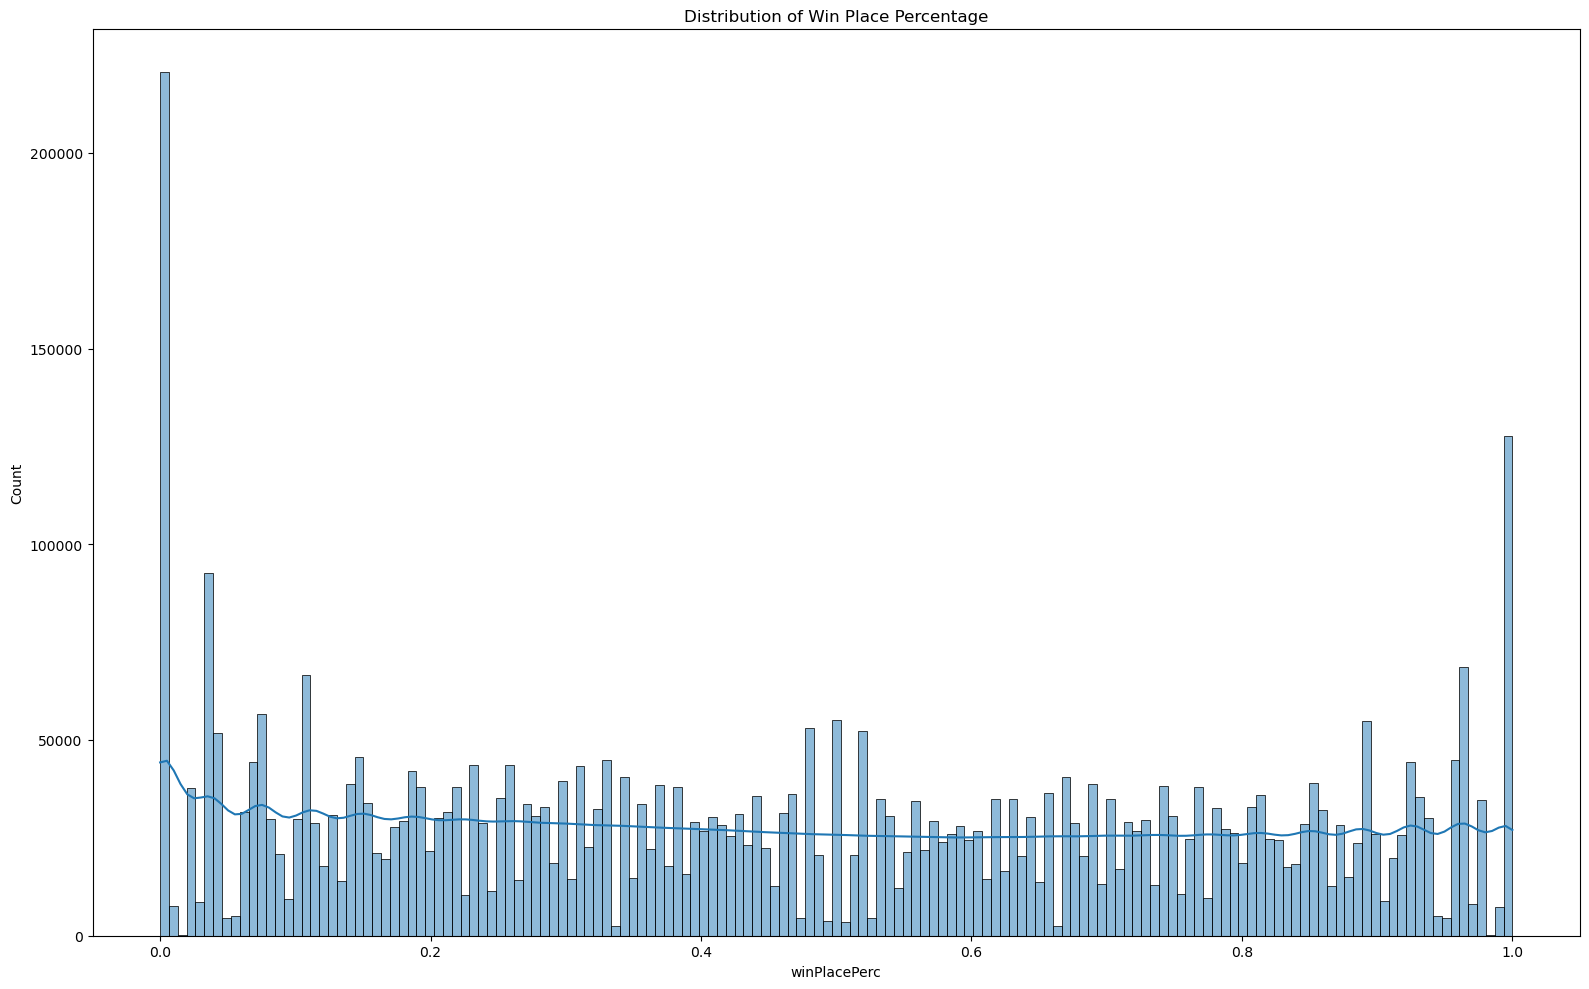

In [ ]:
plt.figure(figsize=(16,10))
sns.histplot(x=data['winPlacePerc'],data=data,kde=True)
plt.title('Distribution of Win Place Percentage')
plt.tight_layout()

- Inference: From the above histplot, we can see 0 & 1 are most frequently occuring.

# **6.0 Univariate Analysis**

- In Univariate Analysis, we will focus on individual variables to understand the characteristics.

In [ ]:
# plt.figure(figsize=(10,10))
# n= 1
# for i in data.drop(['Id', 'groupId', 'matchId','matchType'],axis=1):
#     plt.subplot(7,4,n)
#     sns.histplot(x=i,data=data,kde=True)
#     n += 1
# plt.tight_layout()

# **7.0 Checking and handling Outliers**

In [ ]:
# plt.figure(figsize=(16,10))
# n = 1
# for i in data.drop(['Id', 'groupId', 'matchId','matchType'],axis=1):
#     plt.subplot(7,4,n)
#     sns.boxplot(x=i,data=data)
#     n += 1
# plt.tight_layout()

# **8.0 Handling Anamolies**

 1. Player hiding(not moving) and killing. We will remove these data

In [ ]:
data.loc[(data.walkDistance + data.rideDistance + data.swimDistance) == 0 & (data.kills > 0)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
29,ac5b57ff39979c,857cc55b2b6001,e019e04dee4f19,0,0,0.0,0,0,0,87,0,0,0,0.0,1530,duo,46,44,1534,0,0.0,0,0.0,0,0,0.0,0,0,0.0000
116,6adb021f5165ff,58e5500bd40898,de5c692fe25a73,0,0,0.0,0,0,0,68,311,0,0,0.0,1414,duo,41,36,0,0,0.0,0,0.0,0,0,0.0,0,847,0.0000
151,a2bbe20aa8789d,926e8a09bab249,e36e4203ed4831,0,0,0.0,0,0,0,92,309,0,0,0.0,1377,duo,48,41,-1,0,0.0,0,0.0,0,0,0.0,0,765,0.0000
237,baaa694658e085,d034728f22cff7,fa71620624d3e7,0,0,0.0,0,0,0,94,1397,0,0,0.0,1358,squad-fpp,29,26,-1,0,0.0,0,0.0,0,0,0.0,0,1510,0.0000
283,3ab8128e6bcbe6,bb52a209f2e938,aabd2650b129e2,0,0,0.0,0,0,0,84,0,0,0,0.0,1797,duo,48,47,1500,0,0.0,0,0.0,0,0,0.0,0,0,0.1277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446843,56f1ff8594a328,63008ee9676bc3,b3f07953e112dc,0,0,0.0,0,0,0,99,0,0,0,0.0,1902,squad,30,30,1456,0,0.0,0,0.0,0,0,0.0,0,0,0.0000
4446849,19d2b52c9e17a3,f8a952ce9ab7aa,2afb2889026133,0,0,0.0,0,0,0,90,1243,0,0,0.0,1472,solo-fpp,98,93,-1,0,0.0,0,0.0,0,0,0.0,0,1363,0.0412
4446905,f93dfebceecc59,c54ca5bb9df107,e1da3a1ee799ef,0,0,0.0,0,0,0,89,0,0,0,0.0,1371,duo-fpp,49,48,1465,0,0.0,0,0.0,0,0,0.0,1,0,0.0417
4446926,e0c791ea3c4644,e18240dcce54f9,827639896a20cb,0,0,0.0,0,0,0,87,526,0,0,0.0,1811,squad,29,29,-1,0,0.0,0,0.0,0,0,0.0,0,916,0.0000


In [ ]:
# 97369 records removed
data.drop(data.loc[(data.walkDistance + data.rideDistance + data.swimDistance) == 0 & (data.kills > 0)].index,axis=0,inplace=True)

2. In pubg, a player can kill his/her team-mate only if he has grenade(weapon) or he/she has drove a vehicle over his/her team-mate. Let's drop the data, where player hiding and killing his own teammates without weapons

In [ ]:
data.loc[(data.weaponsAcquired == 0) & (data.teamKills > 0) & ((data.rideDistance) == 0)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
150,528c5d3fde5198,a69d29530369ee,75a3ed5107269f,0,0,0.0,1,0,0,84,0,0,0,0.0,1720,squad,29,28,1471,0,0.0,0,0.000000,1,0,22.600000,0,0,0.1071
1979,2fd411ab25fc89,25226091b29ec0,838cb29103410a,0,0,65.0,2,0,0,96,1284,0,0,0.0,1300,squad-fpp,27,25,-1,0,0.0,0,0.000000,3,0,53.820000,0,1514,0.0000
3048,ac19a7c0009eda,49b1540c8b5887,24def70ac0479d,0,0,100.0,1,0,0,87,1144,0,0,0.0,1797,squad,25,23,0,0,0.0,0,0.000000,1,0,71.309998,0,1484,0.0000
6792,493383a6bc579d,8b172c1a5e558e,b3fb7febb91b9c,0,0,0.0,0,0,0,55,0,0,0,0.0,1880,duo-fpp,47,42,1499,0,0.0,0,0.000000,1,0,0.841500,0,0,0.6087
7333,9bc03d41f1c219,f511c9879a59c3,4998ef70b1c6ee,0,0,0.0,1,0,0,87,0,0,0,0.0,1826,squad,26,26,1452,0,0.0,0,0.000000,1,0,29.850000,0,0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4433548,7f83db8bf2d348,bcea4fd7588dab,61802b85964289,0,0,0.0,0,0,0,52,0,0,0,0.0,1900,duo-fpp,47,46,1497,0,0.0,0,0.000000,1,0,44.980000,0,0,0.6739
4437378,bc947ec5116faa,b7d542f3b7ce6e,fa4af0c09059c6,0,0,0.0,0,0,0,93,0,0,0,0.0,1431,squad,29,29,1500,0,0.0,0,0.000000,1,0,123.199997,0,0,0.0000
4438752,9e34c3c2531941,e2d3f5d87a37cf,e2c695d210bc74,0,0,0.0,1,0,0,81,0,0,0,0.0,1808,squad,26,26,1500,0,0.0,0,0.000000,1,0,3.652000,0,0,0.0800
4444324,7b45862f0e6135,0802f88c8a9ad2,1c28bcc2761bef,0,0,0.0,0,0,0,91,0,0,0,0.0,1890,duo,49,47,1503,0,0.0,0,61.709999,1,0,0.295700,0,0,0.0417


In [ ]:
# 1665 records removed
data.drop(data.loc[(data.weaponsAcquired == 0) & (data.teamKills > 0) & ((data.rideDistance) == 0)].index,axis=0,inplace=True)

3. Killing the players from the car without riding

In [ ]:
data.loc[(data.roadKills > 0) & (data.rideDistance == 0)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
820,209314d1a20b48,72a26f1ded95d6,7abce2d2ca9e49,1,1,334.799988,4,0,1,17,1187,2,1,50.980000,1714,squad-fpp,28,28,-1,0,0.0,1,0.000000,0,0,838.000000,6,1533,0.3704
40362,81863d8837256d,af6e04e1b77f4b,59ad07f21f77dd,0,1,272.399994,1,1,2,22,0,2,1,115.599998,1336,squad-fpp,29,29,1500,0,0.0,1,127.699997,0,0,2443.000000,4,0,0.5357
46376,ed7575c25f2a5e,9be59a8d7ae94b,6c5c240ed3e339,2,5,298.899994,3,0,6,12,1378,2,1,15.090000,1870,duo,50,49,-1,1,0.0,1,0.000000,0,0,3054.000000,4,1509,0.8980
50918,b5f8da95af493f,1a2f5a68a2720c,ae50bb56b6da4e,0,0,169.300003,1,0,0,39,0,1,1,14.420000,1871,duo-fpp,46,44,1453,0,0.0,1,0.000000,0,0,148.600006,1,0,0.1333
55266,77178fffc09d09,86fd3da1738c43,620f0ea9a8c997,0,0,100.000000,2,0,0,31,0,1,1,64.059998,1351,squad-fpp,28,24,1486,1,0.0,1,0.000000,1,0,696.000000,3,0,0.3704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4417743,e32a8f224bee8a,a2f7c3e4f4ff2e,15fbf879405faf,0,3,328.899994,1,1,2,4,1050,4,2,127.000000,1363,duo,47,45,-1,0,0.0,1,104.599998,0,0,2505.000000,4,1499,0.8696
4418648,8dc09552147fe2,0284db08778c3b,f9a88397f45677,0,0,96.430000,1,0,0,31,1211,1,1,7.680000,1848,squad-fpp,27,27,-1,0,0.0,1,0.000000,0,0,1293.000000,3,1429,0.3462
4426830,c9df7b60fd1b00,b7460fb7ea1462,e31f8af291bb6e,0,0,100.000000,1,0,0,36,0,1,1,0.800300,1889,squad,26,25,1512,0,0.0,1,0.000000,0,0,29.410000,1,0,0.0400
4444830,027b3f672516a1,766b70fa9c7750,4248befe3f7d28,0,6,442.899994,4,0,6,4,1175,5,2,59.230000,1371,duo-fpp,50,49,-1,0,0.0,1,0.000000,0,0,2875.000000,5,1503,0.8367


In [ ]:
# 186 records removed
data.drop(data.loc[(data.roadKills > 0) & (data.rideDistance == 0)].index,axis=0,inplace=True)

4. Without moving consumed heals & boosts

In [ ]:
drop_data = data.loc[((data.heals > 0) | (data.boosts > 0)) & (data.walkDistance == 0)]
drop_data

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2907639,2bf1d34142358b,71c15011651348,08dfa30b9390f7,4,0,578.000000,0,0,6,30,0,3,1,17.719999,1007,normal-squad-fpp,6,6,1500,0,1277.0,0,0.000000,0,0,0.0,29,0,0.4
4198517,570d3566a3a783,89103856968216,a372e493b3c6e4,0,0,393.600006,0,0,1,40,1000,4,1,74.029999,577,normal-squad-fpp,8,8,-1,0,0.0,0,162.100006,3,0,0.0,19,1500,0.0


In [ ]:
data.drop(drop_data.index,axis=0,inplace=True)

5. Player hiding and acquiring weapons

In [ ]:
drop_data = data.loc[(data.walkDistance == 0) & (data.weaponsAcquired > 0)]
drop_data

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4053449,33c6bbdeaf2e27,2fb25a6d123a70,a5a5aaacfb89f6,0,0,85.410004,0,0,0,10,0,0,0,0.0,1808,solo,18,2,1500,0,213.100006,0,0.0,0,0,0.0,5,0,0.0


In [ ]:
data.drop(drop_data.index,axis=0,inplace=True)

6. A player cannot assist a teammate if the walkDistance is 0

In [ ]:
drop_data = data.loc[(data.walkDistance ==0) & (data.assists > 0)]
drop_data

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
508195,5139bf6ddda14b,04133b4326edd3,e865993e688bfc,2,0,90.879997,0,0,0,86,1008,0,0,0.000,1703,squad-fpp,28,27,-1,0,260.700012,0,0.0,0,0,0.0,0,1481,0.0000
1053213,4a8011f19b0e0e,037c89b0cef255,238171821a1d0e,1,0,100.000000,1,0,0,38,1621,1,1,1.440,1881,duo-fpp,48,45,-1,0,36.240002,0,0.0,0,0,0.0,0,1747,0.0638
1166930,553f199b5538c5,560c2ba9dcbbd0,afb05e37d884fc,2,0,168.500000,1,0,0,45,1398,1,1,3.268,1799,squad,31,29,-1,0,391.799988,1,0.0,0,0,0.0,0,1499,0.0667
2124890,d7517668617ee7,1a044c298f538b,dd154e2c3735c4,1,0,5.279000,0,0,0,78,1258,0,0,0.000,1882,squad-fpp,30,29,-1,0,1930.000000,0,0.0,0,0,0.0,0,1423,0.1034
2563233,425785b4c266f5,c875ee2a51c7a2,654672a4b70def,1,0,3.805000,0,0,0,71,1444,0,0,0.000,1898,duo-fpp,50,45,-1,0,1725.000000,0,0.0,0,0,0.0,0,1557,0.2653
2894810,c6f966b3f25c64,526a5ee7c26b5a,40b8ec00c46025,1,0,6.831000,0,0,0,76,1505,0,0,0.000,1384,duo-fpp,47,42,-1,0,256.500000,0,0.0,0,0,0.0,0,1546,0.0870
2973342,8645d10a6111ba,5d3e1412e43d3f,72c63fe4367d83,1,0,6.305000,0,0,0,88,1054,0,0,0.000,2129,solo,92,90,-1,0,478.200012,0,0.0,0,0,0.0,0,1483,0.0440
3510124,1a114bffbf6994,befa8cf7db33dd,49157f18a70ad4,1,0,0.000000,0,0,0,82,0,0,0,0.000,1832,squad,28,27,1392,0,3616.000000,0,0.0,0,0,0.0,0,0,0.1852
3806886,f93c283d7c4ae6,c442ae37a8f3e3,21794a8d7f24cb,1,0,8.717000,0,0,0,79,1292,0,0,0.000,2188,solo-fpp,96,93,-1,0,508.600006,0,0.0,0,0,0.0,0,1530,0.1579
3847293,5b25a55425f8b0,5bf4ac7f5f89a0,05a97d10e3cf81,1,0,0.000000,0,0,0,90,0,0,0,0.000,1979,squad,26,26,1464,0,776.799988,0,0.0,1,0,0.0,0,0,0.0000


In [ ]:
data.drop(drop_data.index,axis=0,inplace=True)

7. Without moving dealt damage

In [ ]:
drop_data = data.loc[(data.walkDistance == 0) & (data.damageDealt > 0)]
drop_data

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
219621,49e86bcbb74918,5bf4ac7f5f89a0,05a97d10e3cf81,0,0,100.000000,1,0,0,38,0,1,1,2.150,1979,squad,26,26,1465,0,673.099976,1,0.000,0,0,0.0,0,0,0.0000
252935,d972c9974aad8c,4c55a9cce4a01a,4b65936a68d1a8,0,0,10.210000,0,0,0,88,1069,0,0,0.000,1745,squad-fpp,30,28,-1,0,520.799988,0,0.000,0,0,0.0,0,1471,0.0345
793315,7c2ef942700e52,4e56f622e14131,f19a9988b67a5b,0,0,100.199997,1,0,0,91,1000,0,0,0.000,1968,duo-fpp,49,46,-1,0,229.100006,0,0.000,1,0,0.0,0,1500,0.0208
1051447,c43116d1c3d4e5,bd09c97b67800a,aad60eee7eeb79,0,0,102.199997,0,0,0,34,1320,1,1,4.489,1935,solo,89,85,-1,0,1757.000000,1,0.000,0,0,0.0,0,1532,0.1250
1086948,80dc8381b71000,9a4768fa7c6def,f79ba0a163912c,0,0,21.590000,0,0,0,94,1176,0,0,0.000,1898,squad,28,26,-1,0,1161.000000,0,0.000,0,0,0.0,0,1505,0.0000
1225397,58ebf4fcff315b,1fbdd462840e94,23def48a3ec3fa,0,0,23.750000,0,0,0,84,1576,0,0,0.000,1866,squad-fpp,28,28,-1,0,1328.000000,0,0.000,0,0,0.0,0,1487,0.0370
1303428,9f28cab49667fd,35babab16cc9fc,437d596c7c4a0f,0,0,144.100006,1,0,0,65,1104,0,0,0.000,1319,squad-fpp,26,25,-1,0,2069.000000,0,0.000,1,0,0.0,0,1337,0.2800
1479750,bcdf0f6c5d08bf,ea2ed2cc5955dd,2b59ed013eaf15,0,0,100.000000,1,0,0,46,0,1,1,3.744,1882,duo-fpp,50,47,1509,0,468.299988,1,0.000,0,0,0.0,0,0,0.0612
1654948,99b85ee01fee10,87b99141c9379e,dc8dc12bfe0c71,0,0,40.490002,0,0,0,65,1187,0,0,0.000,1773,squad,28,26,-1,0,201.500000,0,0.000,0,0,0.0,0,1525,0.2222
2145066,923d80f48c31f4,05dba1afd47ddd,030c1fcf4aff43,0,0,88.320000,0,0,0,94,0,0,0,0.000,1886,squad-fpp,31,30,1463,0,649.099976,0,0.000,0,0,0.0,0,0,0.0333


In [ ]:
data.drop(drop_data.index,axis=0,inplace=True)

# **9.0 Scaling and Tranformation**

**1. Removing unnecessary columns**

In [ ]:
data.drop(['Id','groupId', 'matchId'],axis=1,inplace=True)

**2. Standardizing & encoding Match type column**

In [ ]:
# 16 unique match types are present
data.matchType.unique()

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
       'normal-squad-fpp', 'crashfpp', 'flaretpp', 'normal-solo-fpp',
       'flarefpp', 'normal-duo-fpp', 'normal-duo', 'normal-squad',
       'crashtpp', 'normal-solo'], dtype=object)

In [ ]:
# Retaining only the Top 6 match types
retain_values = ['solo', 'duo', 'squad', 'solo-fpp', 'duo-fpp', 'squad-fpp']
data = data[data['matchType'].isin(retain_values)]

In [ ]:
# After retaining
data.matchType.unique()

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo'],
      dtype=object)

- Since 99.21% of data belongs to 6 match types, other data types are removed from the dataset.
- Before removing - 4446966 rows (99.21%)
- After removing  - 4411698 rows (0.79%)

In [ ]:
# Using Label encoder to convert the cat column to numerical column
enc = LabelEncoder()
data['matchType'] = enc.fit_transform(data['matchType'])
data

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,0.000000,0,0,0,60,1241,0,0,0.000000,1306,5,28,26,-1,0,0.0000,0,0.000,0,0,244.800003,1,1466,0.4444
1,0,0,91.470001,0,0,0,57,0,0,0,0.000000,1777,5,26,25,1484,0,0.0045,0,11.040,0,0,1434.000000,5,0,0.6400
2,1,0,68.000000,0,0,0,47,0,0,0,0.000000,1318,0,50,47,1491,0,0.0000,0,0.000,0,0,161.800003,2,0,0.7755
3,0,0,32.900002,0,0,0,75,0,0,0,0.000000,1436,5,31,30,1408,0,0.0000,0,0.000,0,0,202.699997,3,0,0.1667
4,0,0,100.000000,0,0,0,45,0,1,1,58.529999,1424,3,97,95,1560,0,0.0000,0,0.000,0,0,49.750000,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.000000,0,0,0,74,1029,0,0,0.000000,1873,5,29,28,-1,0,1292.0000,0,0.000,0,0,1019.000000,3,1507,0.1786
4446962,0,1,44.150002,0,0,0,69,0,0,0,0.000000,1435,2,93,93,1501,0,0.0000,0,0.000,0,0,81.699997,6,0,0.2935
4446963,0,0,59.060001,0,0,0,66,0,0,0,0.000000,1321,5,28,28,1500,0,0.0000,0,2.184,0,0,788.700012,4,0,0.4815
4446964,0,4,180.399994,1,1,2,11,0,2,1,98.500000,1373,5,26,25,1418,2,0.0000,0,0.000,0,0,2748.000000,8,0,0.8000


In [ ]:
# Selecting the columns for scaling
cols = data.drop(['matchType','winPlacePerc'],axis=1).columns

In [ ]:
# Using Standard encoder for scaling
stdenc = StandardScaler()
data[cols] = stdenc.fit_transform(data[cols])
data

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,-0.406139,-0.654608,-0.793670,-0.590496,-0.386679,-0.517413,0.482895,1.164093,-0.616578,-0.778502,-0.456897,-1.078238,5,-0.700797,-0.741005,-1.209418,-0.353370,-0.406855,-0.046416,-0.150011,-0.141249,-0.085495,-0.789111,-1.182377,1.156491,0.4444
1,-0.406139,-0.654608,-0.243516,-0.590496,-0.386679,-0.517413,0.371977,-0.807710,-0.616578,-0.778502,-0.456897,0.771950,5,-0.785149,-0.784208,0.805171,-0.353370,-0.406852,-0.046416,0.209078,-0.141249,-0.085495,0.214910,0.567390,-0.822505,0.6400
2,1.330929,-0.654608,-0.384679,-0.590496,-0.386679,-0.517413,0.002253,-0.807710,-0.616578,-0.778502,-0.456897,-1.031099,0,0.227076,0.166262,0.814668,-0.353370,-0.406855,-0.046416,-0.150011,-0.141249,-0.085495,-0.859187,-0.744935,-0.822505,0.7755
3,-0.406139,-0.654608,-0.595790,-0.590496,-0.386679,-0.517413,1.037482,-0.807710,-0.616578,-0.778502,-0.456897,-0.567570,5,-0.574269,-0.568192,0.702068,-0.353370,-0.406855,-0.046416,-0.150011,-0.141249,-0.085495,-0.824655,-0.307493,-0.822505,0.1667
4,-0.406139,-0.654608,-0.192212,-0.590496,-0.386679,-0.517413,-0.071692,-0.807710,0.045013,0.627186,0.688481,-0.614709,3,2.209350,2.240013,0.908275,-0.353370,-0.406855,-0.046416,-0.150011,-0.141249,-0.085495,-0.953788,-0.744935,-0.822505,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,-0.406139,-0.654608,-0.793670,-0.590496,-0.386679,-0.517413,1.000509,0.827250,-0.616578,-0.778502,-0.456897,1.149059,5,-0.658621,-0.654598,-1.209418,-0.353370,0.455533,-0.046416,-0.150011,-0.141249,-0.085495,-0.135467,-0.307493,1.211838,0.1786
4446962,-0.406139,-0.075108,-0.528126,-0.590496,-0.386679,-0.517413,0.815647,-0.807710,-0.616578,-0.778502,-0.456897,-0.571498,2,2.040646,2.153606,0.828234,-0.353370,-0.406855,-0.046416,-0.150011,-0.141249,-0.085495,-0.926814,1.004832,-0.822505,0.2935
4446963,-0.406139,-0.654608,-0.438449,-0.590496,-0.386679,-0.517413,0.704730,-0.807710,-0.616578,-0.778502,-0.456897,-1.019315,5,-0.700797,-0.654598,0.826877,-0.353370,-0.406855,-0.046416,-0.078974,-0.141249,-0.085495,-0.329905,0.129948,-0.822505,0.4815
4446964,-0.406139,1.663391,0.291361,0.292714,1.303776,0.225722,-1.328756,-0.807710,0.706605,0.627186,1.470658,-0.815048,5,-0.785149,-0.784208,0.715634,3.854765,-0.406855,-0.046416,-0.150011,-0.141249,-0.085495,1.324299,1.879715,-0.822505,0.8000


In [ ]:
# Ensuring after scaling no null values present
data.isnull().sum()

assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

# **10.0 Correllation**

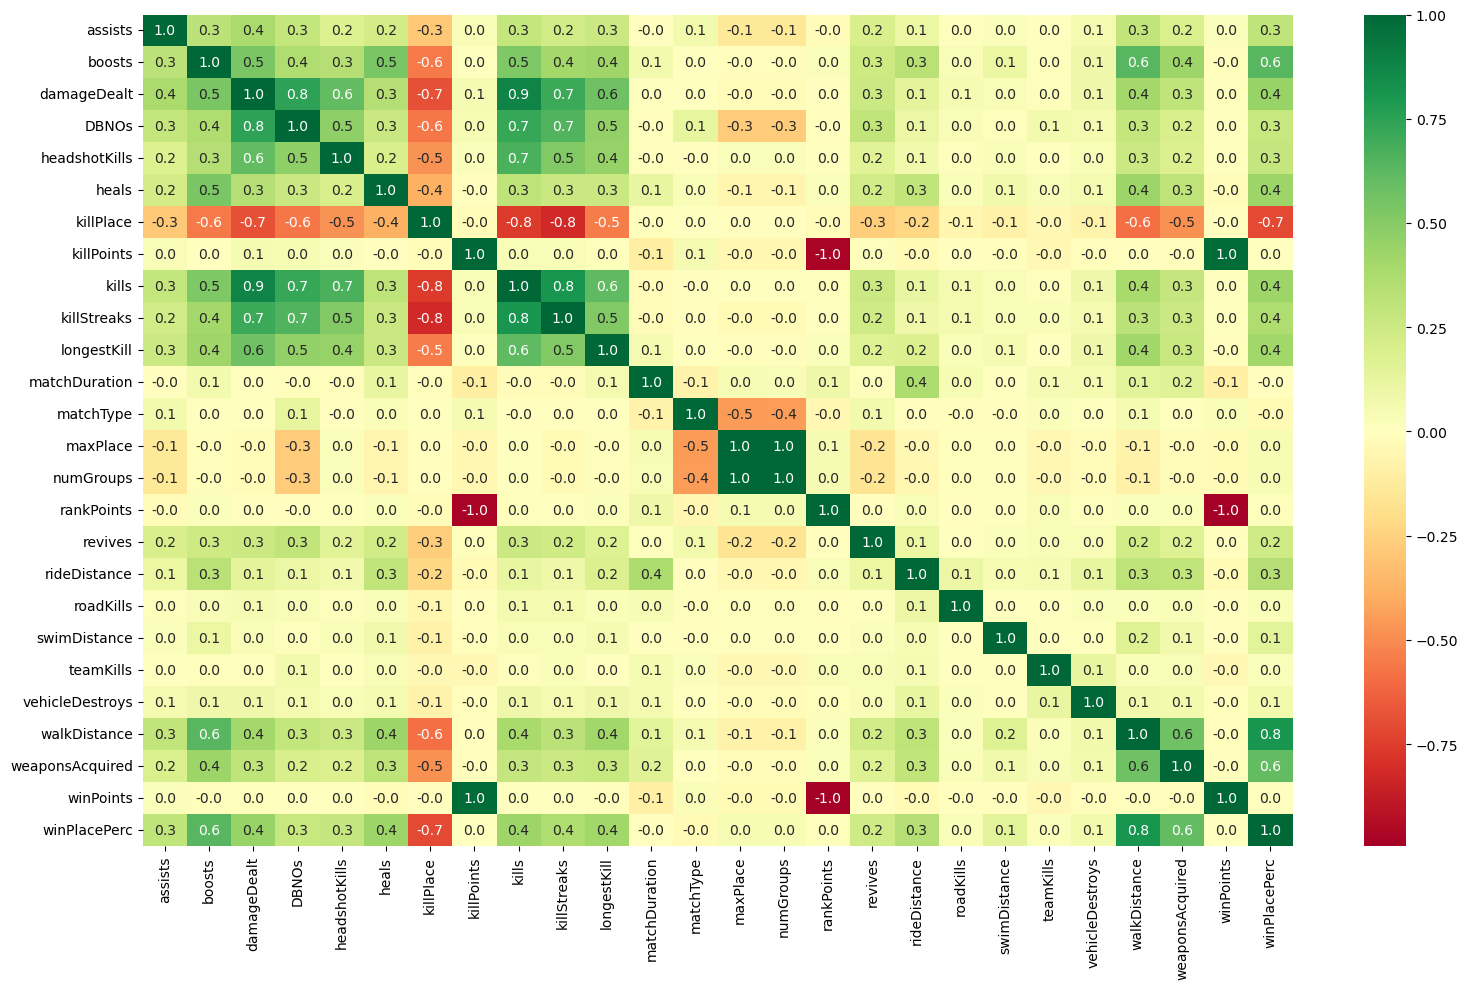

In [ ]:
plt.figure(figsize=(16,10))
corr = data.corr()
sns.heatmap(corr,cmap='RdYlGn',annot=True,fmt= '.1f')
plt.tight_layout()

# **11.0 Splitting data**

In [ ]:
x = data.drop('winPlacePerc',axis=1)
y = data.winPlacePerc
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# **12.0 Models**

## **12.1 Load Model Structure**

In [ ]:
R2_Score =pd.DataFrame(columns=['Model_Name','r2_Score'])
def loadModel(MLModel,rs=None):
    global R2_Score
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=rs)
    model = MLModel()
    model.fit(x_train,y_train)
    LRPred = model.predict(x_test)
    mse = mean_squared_error(y_test,LRPred)
    r2 = r2_score(y_test,LRPred)
    adjusted_r2 = adjusted_r2 = 1-((1-r2)*(y_test.shape[0]-1)/(y_test.shape[0]-x_train.shape[1]-1))
    model_name = model.__class__.__name__
    values = pd.DataFrame({
        'Model_Name' : [model_name],
        'r2_Score' : [r2]
    })
    R2_Score = pd.concat([R2_Score,values],ignore_index=True)
    print('MSE ->',mse)
    print('R2-> ',r2)
    print('Adjusted R2-> ',adjusted_r2)
    return model_name

In [ ]:
# Comparing to see which random state gives best R2 score
def bestR2Score(MLModel):
    r2 = []
    randi = []
    model = MLModel()
    for i in range(1,43):
            x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=i)
            model.fit(x_train,y_train)
            pred = model.predict(x_test)
            r2.append(r2_score(y_test,pred))
            randi.append(i)
    r2max = np.max(r2)
    imax = randi[np.argmax(r2)]
    print(r2max)
    print(imax)
    return imax

In [ ]:
def timer(fn, *args, **kwargs):
    start_time = datetime.now()
    result = fn(*args, **kwargs)
    end_time = datetime.now()
    execution_time = end_time - start_time
    print(f"Execution time for {result} : {execution_time}")
    return result

## **12.2 Linear Regression**

In [ ]:
#timer(loadModel,LinearRegression)
#timer(loadModel,LinearRegression,bestR2Score(LinearRegression))
timer(loadModel,LinearRegression,6)
#print(R2_Score)

MSE -> 0.015013742128716949
R2->  0.8366139333651224
Adjusted R2->  0.8366091995239451
Execution time for LinearRegression : 0:00:07.205058


'LinearRegression'

## **12.3  Decision Tree Regressor**

In [ ]:
#timer(loadModel,DecisionTreeRegressor)
#timer(loadModel,DecisionTreeRegressor,bestR2Score(DecisionTreeRegressor))
timer(loadModel,DecisionTreeRegressor,6)
#print(R2_Score)

MSE -> 0.013180789942190716
R2->  0.8565609156376833
Adjusted R2->  0.8565567597273418
Execution time for DecisionTreeRegressor : 0:00:52.207678


'DecisionTreeRegressor'

## **12.4  Random Forest Regressor**

In [ ]:
#timer(loadModel,RandomForestRegressor)
#timer(loadModel,RandomForestRegressor,bestR2Score(RandomForestRegressor))
#timer(loadModel,RandomForestRegressor,6)
#print(R2_Score)

# MemoryError: could not allocate 234881024 bytes

## **12.5  Gradient Boosting Regressor**

In [ ]:
#timer(loadModel,GradientBoostingRegressor)
#timer(loadModel,GradientBoostingRegressor,bestR2Score(GradientBoostingRegressor))
timer(loadModel,GradientBoostingRegressor,6)
print(R2_Score)

MSE -> 0.008841933878327362
R2->  0.90377823293885
Adjusted R2->  0.9037754450722195
Execution time for GradientBoostingRegressor : 0:23:00.301516
                  Model_Name  r2_Score
0           LinearRegression  0.836614
1      DecisionTreeRegressor  0.856561
2  GradientBoostingRegressor  0.903778


# **13. Results**

## **13.1 Visualization of R2 Scores**

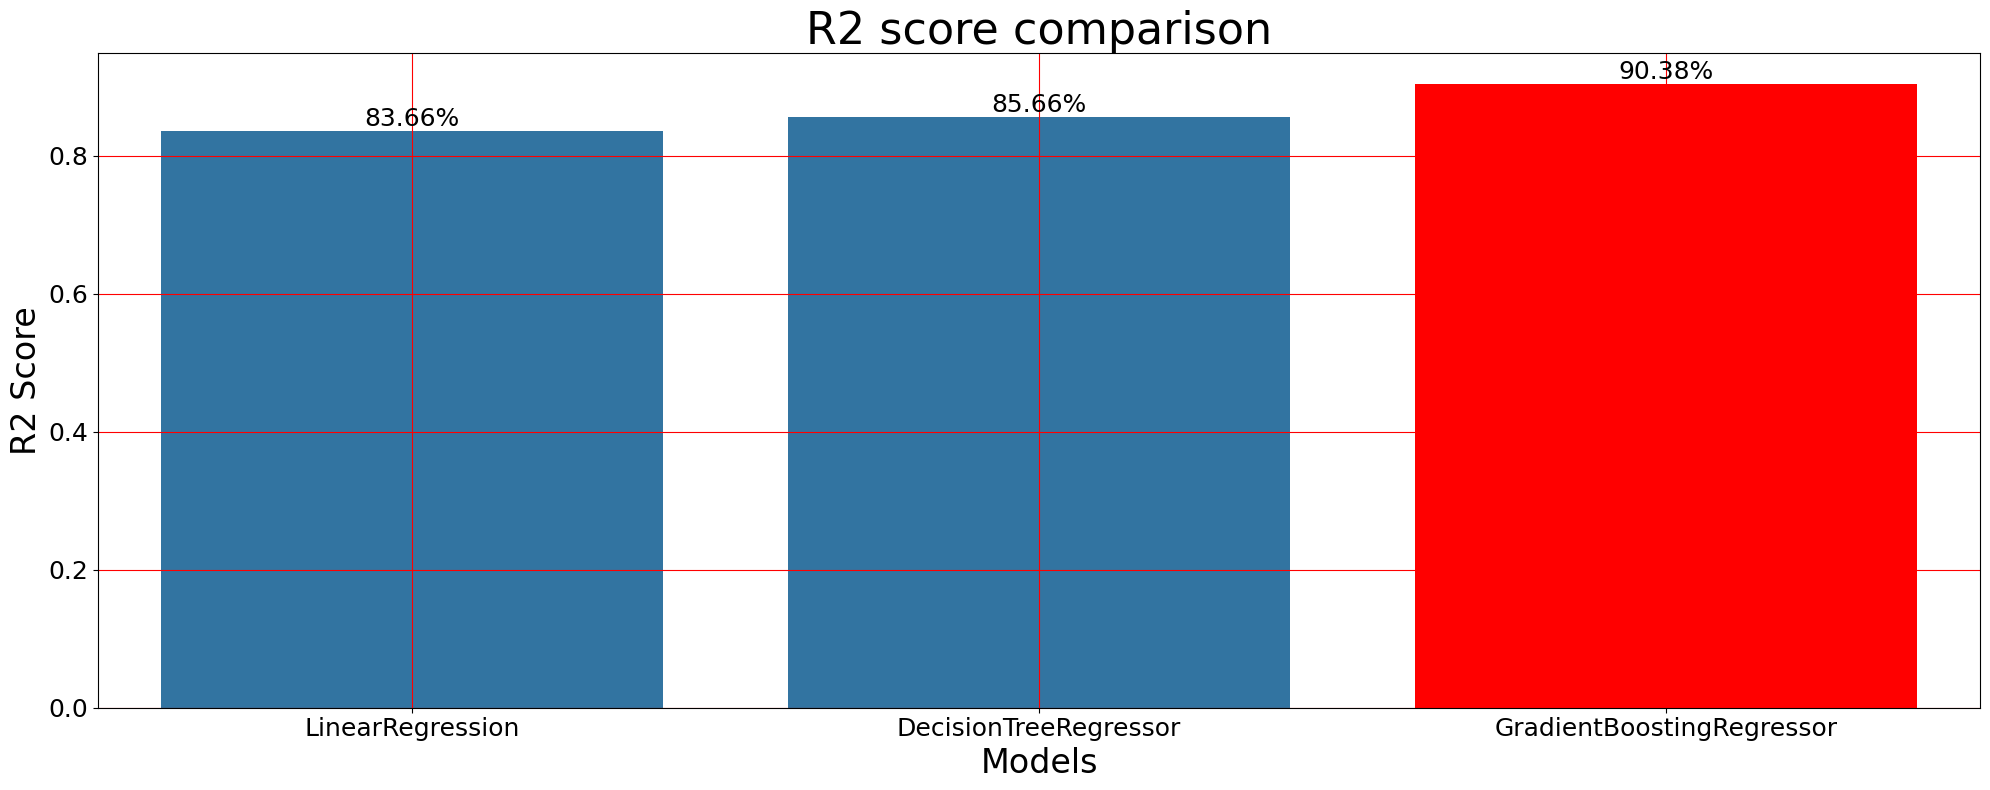

In [ ]:
plt.figure(figsize=(20,8))
R2_Score['Percentage'] = (R2_Score['r2_Score']) * 100
ax = sns.barplot(x = 'Model_Name',y = 'r2_Score', data=R2_Score)
# Add labels to the bars
for container in ax.containers:
    labels = [f'{v:.2f}%' for v in R2_Score['Percentage']]
    ax.bar_label(container,labels = labels,fontsize = 18)

# Highlight the bar with the maximum value
max_index = R2_Score['r2_Score'].idxmax()
ax.patches[max_index].set_facecolor('red')

# Plot the bar graph
plt.grid(color='r')
plt.title('R2 score comparison',fontsize = 32)
plt.xlabel('Models',fontsize = 24)
plt.ylabel('R2 Score',fontsize = 24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()

## 13.3 Conclusion

- **Linear Regression** - Model achieved R2 score of 83.66%. For huge dataset like this score is good. Let's explore other models and conclude.
- **Decision Tree Regressor** - R2 score - 85.64%
- **Gradient Boosting Regressor** - This model achieved an R2 score of 90.38% which is quite impresive for regression tasks.

From the above analysis, it is evident that **Gradient Boosting Regressor** model have an **R2 score of 90.38**.

**With that we conclude Gradient Boosting Regressor with an R2 score of 90.38 is the best model for PUBG Game Winning Prediction.**